In [233]:
import glob
import matplotlib.pyplot as plt
import os
import re
import numpy as np

In [234]:
root_path = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))
log_path = os.path.join(root_path, 'log')
log_prefix = 'lockfree-nohotspot-skiplist'
log_file_names = glob.glob(log_path + f"/{log_prefix}-*.log")
name_pattern = re.compile(rf".+{log_prefix}(-[a-z]+)?-n\d+-i(\d+)-u\d+\.\d+\.log")
log_pattern = re.compile(r"Thread \d+: range query from \d+ found \d+ values, took (\d+) us")

Average time for /home/sh/synchrobench-nkk/synchrobench/c-cpp/log/lockfree-nohotspot-skiplist-cfna-n20-i6400-u50.1.log: 3.6999135197463247 us
17345
Average time for /home/sh/synchrobench-nkk/synchrobench/c-cpp/log/lockfree-nohotspot-skiplist-cfna-n20-i6400000-u50.1.log: 24.28230214254482 us
18296
Average time for /home/sh/synchrobench-nkk/synchrobench/c-cpp/log/lockfree-nohotspot-skiplist-cfna-n20-i640000-u50.1.log: 15.787117726657646 us
18475
Average time for /home/sh/synchrobench-nkk/synchrobench/c-cpp/log/lockfree-nohotspot-skiplist-n20-i6400000-u50.1.log: 19.901135314248464 us
18409
Average time for /home/sh/synchrobench-nkk/synchrobench/c-cpp/log/lockfree-nohotspot-skiplist-cfnr-n20-i640-u50.1.log: 2.889666368114644 us
17864
Average time for /home/sh/synchrobench-nkk/synchrobench/c-cpp/log/lockfree-nohotspot-skiplist-cfnr-n20-i6400-u50.1.log: 3.4944910964207017 us
16791
Average time for /home/sh/synchrobench-nkk/synchrobench/c-cpp/log/lockfree-nohotspot-skiplist-cfnr-n20-i6400000-

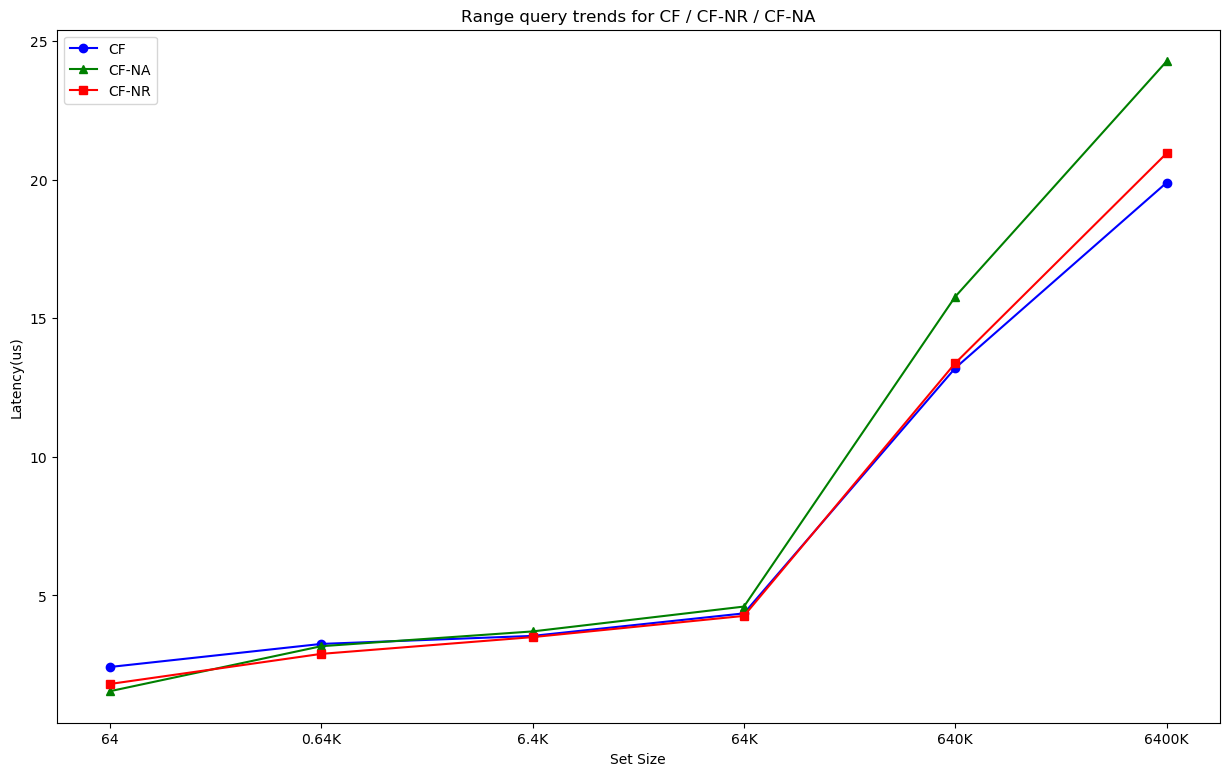

In [235]:
values_cf = []
values_cf_na = []
values_cf_nr = []
         
for log_file in log_file_names:
    match = name_pattern.match(log_file)
    if match:
        option = match.group(1)
    else:
        continue

    total_time = 0
    count = 0
    with open(log_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if line.startswith('Thread '):
                m = log_pattern.match(line)
                if m:
                    time = int(m.group(1))
                    total_time += time
                    count += 1

    if count > 0:
        average_time = total_time / count
        if option is None:
            values_cf.append(average_time)
        elif option == '-cfnr':
            values_cf_nr.append(average_time)
        elif option == '-cfna':
            values_cf_na.append(average_time)
        else:
            continue

        print(f"Average time for {log_file}: {average_time} us")
        print(count)
    else:
        print(f"No 'took ... us' patterns found in {log_file}.")


print(values_cf)
print(values_cf_na)
print(values_cf_nr)

values_cf.sort()
values_cf_na.sort()
values_cf_nr.sort()


# 데이터 설정
categories = ['64', '0.64K', '6.4K', '64K', '640K', '6400K']

# 카테고리별 인덱스를 생성하여 각 점의 x 좌표로 사용
x = np.arange(len(categories))

# 새로운 그래프 생성
fig, ax = plt.subplots(figsize=(15, 9))

# 각 데이터 시리즈에 대한 점과 선 플롯 생성
ax.plot(x, values_cf, marker='o', linestyle='-', color='blue', label='CF')
ax.plot(x, values_cf_na, marker='^', linestyle='-', color='green', label='CF-NA')
ax.plot(x, values_cf_nr, marker='s', linestyle='-', color='red', label='CF-NR')

# x축에 카테고리 이름 설정
ax.set_xticks(x)
ax.set_xticklabels(categories)

# 레이블과 타이틀 설정
ax.set_xlabel('Set Size')
ax.set_ylabel('Latency(us)')
ax.set_title('Range query trends for CF / CF-NR / CF-NA')

# 범례 표시
ax.legend()

# 그래프 표시
plt.show()